In [1]:
import modules.yolov1_inference_utils as yv1
import onnx
import onnxruntime
import matplotlib.pyplot as plt

## Load and Preprocess image

In [2]:
img_file = './WEB10437.jpg'
img_to_model = yv1.preprocess_image_for_prediction(img_file)

## Load ONNX and Check

In [3]:
detector_models_folder = './onnx_detection_models/'
detector_onnx_filename = detector_models_folder + 'w8a8b8__bed_detector___aimet__fixed_point__qcdq__CPU.onnx'
detector_check = onnx.load(detector_onnx_filename)
onnx.checker.check_model(detector_check)
print("ONNX checked ok")
detect_session = onnxruntime.InferenceSession(detector_onnx_filename, providers=["CPUExecutionProvider"])

ONNX checked ok


## Prediction

In [4]:
model_out = yv1.onnx_predict(img_to_model, detect_session)

In [5]:
print("Print Boxes")
yv1.get_bboxes_from_model_out(model_out)

Print Boxes


[[0.40822928292410715,
  0.8318219866071429,
  0.139892578125,
  0.205810546875,
  0.64874267578125,
  1.0],
 [0.19959368024553573,
  0.4959193638392857,
  0.43121337890625,
  0.755340576171875,
  0.645355224609375,
  0.0],
 [0.5188380650111607,
  0.15472848074776785,
  0.08746337890625,
  0.08447265625,
  0.21429443359375,
  1.0]]

## Image to Plot

In [6]:
img = yv1.preprocess_image_for_plotting(img_file)
img_to_plot = yv1.plot_predicted_img(img, model_out)

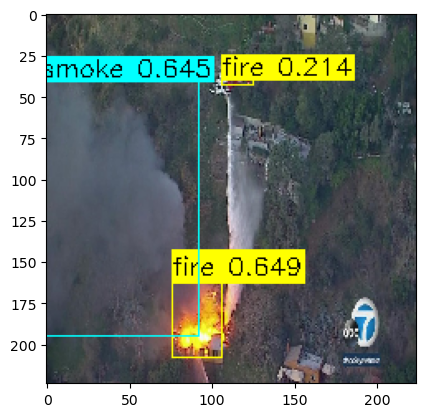

In [7]:
plt.imshow(img_to_plot)
plt.show()